### Harshada Patil 

# Optimizing Sales Forecasting: Building a Predictive Model for BigMart's 2013 Sales Data

## Introduction

BigMart's data science project involves the analysis of 2013 sales data for **1559 products across 10 stores in different cities**. The goal is to develop a **predictive model that can accurately forecast the sales of each product in specific stores**. By uncovering key attributes of both products and stores, BigMart aims to identify factors crucial for boosting sales. A challenge arises from missing values in the dataset, stemming from technical glitches in some stores' data reporting. The project requires effective handling of these missing values to ensure the model's accuracy. Overall, this initiative seeks to enhance BigMart's understanding of the factors driving increased sales and inform strategic decision-making in the retail sector.

## Problem Statement

**Develop a predictive model to analyze 2013 sales data for 1559 products across 10 stores, identifying key product and store attributes influencing sales, and addressing missing values to enhance BigMart's understanding of factors driving increased sales**


## Hypothesis

**Product Attributes Impact Sales:** The hypothesis is that specific attributes of products, such as size, brand, and type, significantly influence sales performance.

**Store Location and Size Influence Sales:** It is hypothesized that the geographical location and physical size of a store play a crucial role in determining the sales of products within that store.

**Promotional Activities Boost Sales:** The hypothesis posits that promotional activities, including discounts and advertising, positively impact product sales.

**Store Capacity and Inventory Management:** It is hypothesized that efficient store capacity utilization and effective inventory management contribute to increased sales.

**Seasonal Trends Affect Sales:** The hypothesis is that sales exhibit seasonal patterns, with variations influenced by factors such as holidays, weather conditions, and special events.

**Customer Demographics Impact Sales:** It is hypothesized that understanding the demographics of the customer base, such as age, income, and preferences, can provide insights into product sales.

**Missing Data Imputation:** The hypothesis suggests that the careful imputation of missing values in the dataset will enhance the accuracy and reliability of the predictive model.

**Store-Specific Trends Exist:** It is hypothesized that each store may exhibit unique trends and patterns in sales, necessitating store-specific modeling for accurate predictions.

## Data Understanding

### Dataset Description

#### Overview of data

This dataset provides information about various products and their sales across different stores. 
- Dataset link: (https://shahyaseen71.gitbook.io/technocolabs-mini-project/) 

Here are the key features present in the dataset:

- **Item_Identifier:** Unique product ID.
- **Item_Weight:** product weight.
- **Item_Fat_Content:** Indicates if the product is low fat or not.
- **Item_Visibility:** Percentage of the total display area allocated to the product in a store.
- **Item_Type:** Category to which the product belongs.
- **Item_MRP:** Maximum Retail Price (list price) of the product.
- **Outlet_Identifier:** Unique store ID.
- **Outlet_Establishment_Year:** The year when the store was established.
- **Outlet_Size:** The size of the store in terms of ground area covered.
- **Outlet_Location_Type:** The type of city in which the store is located.
- **Outlet_Type:** Indicates if the outlet is a grocery store or a supermarket.
- **Item_Outlet_Sales:** Sales of the product in the particular store (the target column).

### Loading Packages and Data

In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split

In [2]:
# Load the training and testing dataset

train = pd.read_csv('Dataset\Train.csv')
test = pd.read_csv('Dataset\Test.csv')

In [3]:
# Training Data view
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
# Testing Data view
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

## Data Structure and Content


Write bit about data content

In [5]:
# Check shape of training data
train.shape

(8523, 12)

In [6]:
# Check shape of testing data
test.shape

(5681, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
# describe the numeric columns in train set
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
# describe the numeric columns in test set
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

> **Unique values in Dataset**



In [13]:
# Item_Fat_Content  
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- **Inference:** In *Item_Fat_Content* column has actually only two sub categories but in dataset we can see there are five sub categories. we will handle this problem ahead.

In [14]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [15]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

- **Inference:** In *Outlet_Size* column has many missing null.

In [16]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
test['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [18]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

Now we handle the missing values using different technique.

In [20]:
train.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The Mode of Outlet_Size is Medium, now we will replace the  missing or Nan values with mode.

In [21]:
test.isnull().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
unique_count = train.nunique()

print(unique_count)

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [24]:
## Combine dataset
# Add a 'source' column to identify the source of each record 
train['markdown'] = 'train' 
test['markdown'] = 'test' 
test['Item_Outlet_Sales'] = 0.0 
# we dont have target column in test set 
# to Combine the datasets vertically we need same column size of dataframe

combined_df = pd.concat([train, test], ignore_index=True) # Display the combined dataframe combined_df

In [25]:
combined_df.sample(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3899           FDX04         19.6          Regular         0.041741   
5654           FDB38          NaN          Regular         0.027214   
1021           FDI45         13.1               LF         0.037550   
7010           FDI41         18.5          Regular         0.062245   
2356           FDQ40         11.1          Regular         0.036231   

                  Item_Type  Item_MRP Outlet_Identifier  \
3899           Frozen Foods   49.2376            OUT018   
5654                 Canned  159.6920            OUT027   
1021  Fruits and Vegetables  176.1054            OUT013   
7010           Frozen Foods  145.8418            OUT035   
2356           Frozen Foods  175.0712            OUT017   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3899                       2009      Medium               Tier 3   
5654                       1985      Medium               Tier 3   
1021                       1987        High               Tier 3   
7010                       2004       Small               Tier 2   
2356                       2007         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales markdown  
3899  Supermarket Type2           958.7520    train  
5654  Supermarket Type3          3515.4240    train  
1021  Supermarket Type1          4027.4242    train  
7010  Supermarket Type1          5591.3884    train  
2356  Supermarket Type1          3339.6528    train

In [26]:
combined_df.shape

(14204, 13)

In [27]:
combined_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
markdown                        0
dtype: int64

In [28]:
# Save the combined dataframe to a CSV file 
combined_df.to_csv('combined_df.csv', index=False) # Verify the file creation 

import os 
print(f"File 'combined_df.csv' created: {os.path.isfile('combined_df.csv')}")

File 'combined_df.csv' created: True


In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  markdown                   14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

### Combined_df Overview:
- Number of rows: 14204
- Number of columns: 13

**Dataset Overview**

  - **Item_Identifier:** Unique product ID.
  - **Item_Weight:** product weight.
  - **Item_Fat_Content:** Indicates if the product is low fat or not.
    - There are two sub-categories **['low_fat', 'regular']**. 
  - **Item_Visibility:** Percentage of the total display area allocated to the product in a store.
  - **Item_Type:** Category to which the product belongs.
  - **Item_MRP:** Maximum Retail Price (list price) of the product.
  - **Outlet_Identifier:** Unique store ID.
  - **Outlet_Establishment_Year:** The year when the store was established.
  - **Outlet_Size:** The size of the store in terms of ground area covered.
      - There are two sub-categories **[Medium, High, Small]**.
  - **Outlet_Location_Type:** The type of city in which the store is located.
  - **Outlet_Type:** Indicates if the outlet is a grocery store or a supermarket.
  - **Item_Outlet_Sales:** Sales of the product in the particular store (the target column).
  - **markdown:** Identicates that which observation is from test set or train set.
  
  **Missing values**
  
  Dataset has missing values in following columns:
  
  - **Outlet_Size:** 4016
  
      - 28% data of Outlet_Size is missing in this column. 

  - **Item_Weight:** 2439
  
      - 17% data of Item_Weight is missing in this column.
  - we fill the missing values with mean and mode for further analysis.
  > **Note:** Most authors suggest that missing values less than 10% of the data is acceptable to make generalizations of study conclusions.
  

In [30]:
unique_values = combined_df.nunique()
print(unique_values)

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
markdown                         2
dtype: int64


### Exploratory Data Analysis

#### Univariate Analysis

In [31]:
combined_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'markdown'],
      dtype='object')

> Categorical columns

- Item_Fat_Content

In [32]:
combined_df['Item_Weight'].isnull().sum()

2439

In [33]:
combined_df['Item_Fat_Content'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Item_Fat_Content
Non-Null Count  Dtype 
--------------  ----- 
14204 non-null  object
dtypes: object(1)
memory usage: 111.1+ KB


In [34]:
# Frequency Distribution

frequency_distribution = combined_df['Item_Fat_Content'].value_counts()
print("Frequency Distribution:")
print(frequency_distribution)

Frequency Distribution:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [35]:
percentage_distribution = combined_df['Item_Fat_Content'].value_counts(normalize=True) * 100
print("Percentage Distribution:")
print(percentage_distribution)

Percentage Distribution:
Low Fat    59.736694
Regular    33.962264
LF          3.675021
reg         1.372853
low fat     1.253168
Name: Item_Fat_Content, dtype: float64


> Percentage Distribution of Item_Fat_content

- **64%** : Low fat
- **35%** : regular 


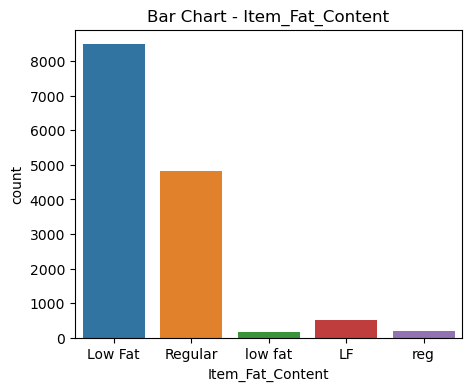

In [36]:
# Bar plot 
plt.figure(figsize=(5,4))
sns.countplot(x='Item_Fat_Content', data=combined_df)
plt.title('Bar Chart - Item_Fat_Content')
plt.show()

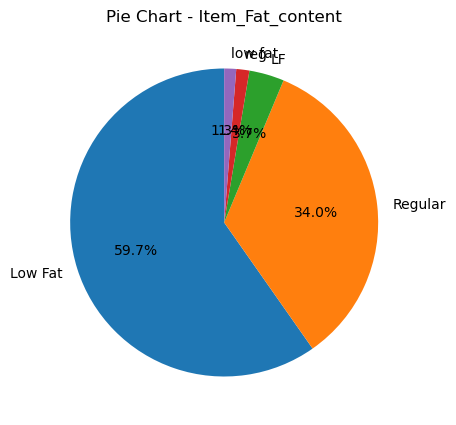

In [37]:
plt.figure(figsize=(5, 5))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart - Item_Fat_content')
plt.show()

> **Inference:** 

   - 64% of product contains low fat and remain has 35% regular fat.

   - In Item_Fat_content column has actually only to sub categories but that written in different format such low fat as Low Fat, LF, and regular as reg, Regular. 

- Item_Type

In [38]:
combined_df['Item_Type'].isnull().sum()

0

In [39]:
combined_df['Item_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Item_Type
Non-Null Count  Dtype 
--------------  ----- 
14204 non-null  object
dtypes: object(1)
memory usage: 111.1+ KB


In [40]:
# Frequency Distribution

frequency_distribution = combined_df['Item_Type'].value_counts()
print("Frequency Distribution:")
print(frequency_distribution)



Frequency Distribution:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


In [41]:
percentage_distribution = combined_df['Item_Type'].value_counts(normalize=True) * 100
print("Percentage Distribution:")
print(percentage_distribution)

Percentage Distribution:
Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: Item_Type, dtype: float64


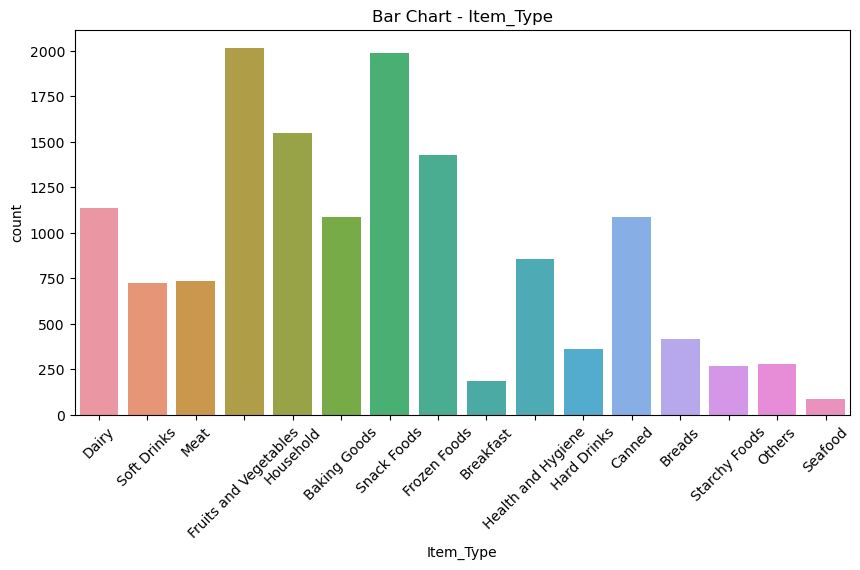

In [42]:
# Bar plot 
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type', data=combined_df)
plt.title('Bar Chart - Item_Type')

plt.xticks(rotation=45)
plt.show()

In [43]:
top_5_items = percentage_distribution.head()

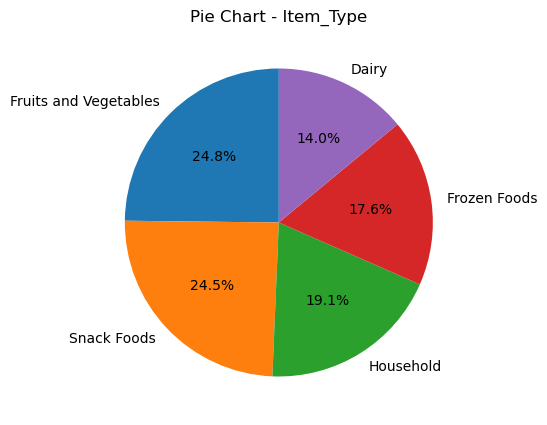

In [44]:
## top five TYPE of ITEMS
plt.figure(figsize=(5,5))
plt.pie(top_5_items, labels=top_5_items.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart - Item_Type')
plt.show()

> **Inference:**  Item_Type has 16 different categories. selecting top 5 Type of item by count that is Fruits and Vegetables, Snack Foods, Household, Frozen Foods and Dairy.

- Outlet_Size

In [45]:
combined_df['Outlet_Size'].isnull().sum()

4016

In [46]:
combined_df['Outlet_Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Outlet_Size
Non-Null Count  Dtype 
--------------  ----- 
10188 non-null  object
dtypes: object(1)
memory usage: 111.1+ KB


In [47]:
# Frequency Distribution
freq_d3 = combined_df['Outlet_Size'].value_counts()
print("Frequency Distribution:")
print(frequency_distribution)

Frequency Distribution:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


In [48]:
# Percentage distribution
pd3 = combined_df['Outlet_Size'].value_counts(normalize=True) * 100
print("Percentage Distribution:")
print(percentage_distribution)

Percentage Distribution:
Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: Item_Type, dtype: float64


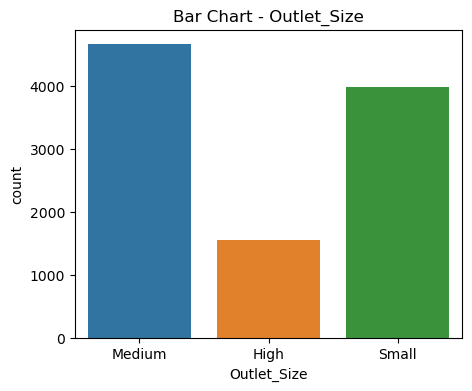

In [49]:
# Bar plot 
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size', data=combined_df)
plt.title('Bar Chart - Outlet_Size')
plt.show()


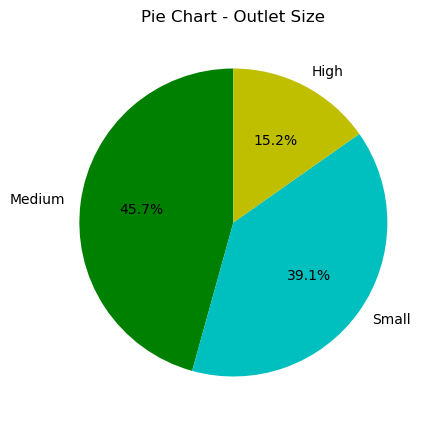

In [50]:
# pie chart
plt.figure(figsize=(5, 5))
plt.pie(pd3, labels=pd3.index, autopct='%1.1f%%', colors='gcy', startangle=90)
plt.title('Pie Chart - Outlet Size')
plt.show()

> **Inference: **  
    
    - 

- Outlet_Location_Type

In [51]:
combined_df['Outlet_Location_Type'].isnull().sum()

0

In [52]:
combined_df['Outlet_Location_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Outlet_Location_Type
Non-Null Count  Dtype 
--------------  ----- 
14204 non-null  object
dtypes: object(1)
memory usage: 111.1+ KB


In [53]:
# Frequency Distribution
freq_d4 = combined_df['Outlet_Location_Type'].value_counts()
print("Frequency Distribution:")
print(frequency_distribution)

Frequency Distribution:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


In [54]:
# Percentage Distribution
pd4 = combined_df['Outlet_Location_Type'].value_counts(normalize=True) * 100
print("Percentage Distribution:")
print(percentage_distribution)

Percentage Distribution:
Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: Item_Type, dtype: float64


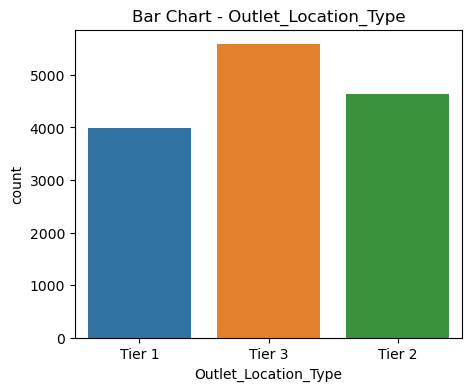

In [55]:
# Bar plot 
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Location_Type', data=combined_df)
plt.title('Bar Chart - Outlet_Location_Type')
plt.show()

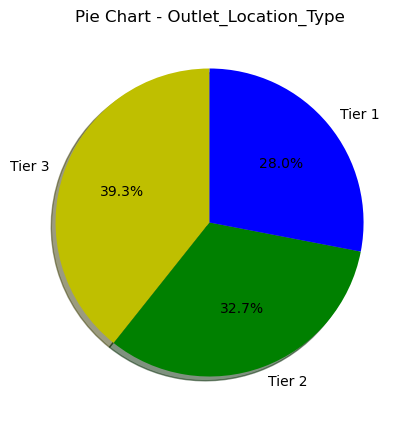

In [56]:
# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(pd4, labels=pd4.index, autopct='%1.1f%%',shadow=True, colors='ygb', startangle=90)
plt.title('Pie Chart - Outlet_Location_Type')
plt.show()

- Outlet_Type

In [57]:
combined_df['Outlet_Type'].isnull().sum()

0

In [58]:
combined_df['Outlet_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Outlet_Type
Non-Null Count  Dtype 
--------------  ----- 
14204 non-null  object
dtypes: object(1)
memory usage: 111.1+ KB


In [59]:
# Frequency Distribution
frequency_distribution = combined_df['Outlet_Type'].value_counts()
print("Frequency Distribution:")
print(frequency_distribution)

Frequency Distribution:
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


In [60]:
# Percentage Distribution 
percentage_distribution = combined_df['Outlet_Type'].value_counts(normalize=True) * 100
print("Percentage Distribution:")
print(percentage_distribution)

Percentage Distribution:
Supermarket Type1    65.432273
Grocery Store        12.707688
Supermarket Type3    10.975781
Supermarket Type2    10.884258
Name: Outlet_Type, dtype: float64


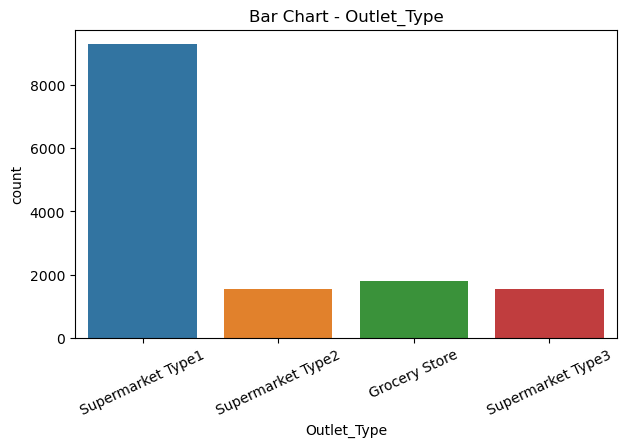

In [61]:
# Bar plot 
plt.figure(figsize=(7,4))
sns.countplot(x='Outlet_Type', data=combined_df)
plt.title('Bar Chart - Outlet_Type')
plt.xticks(rotation=25)
plt.show()


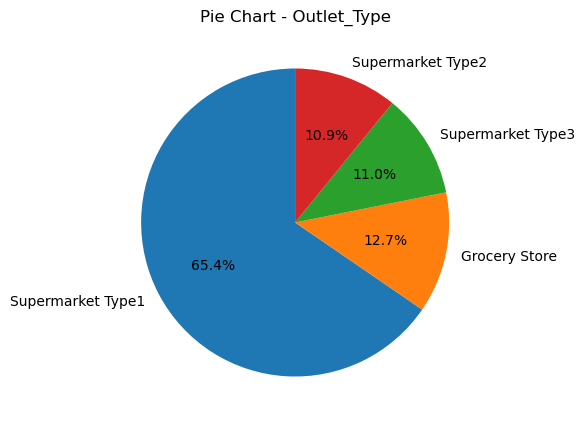

In [62]:
# Pie chart
plt.figure(figsize=(6, 5))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart - Outlet_Type')
plt.show()

> Numerical columns

- Item_Weight
- Item_Visibility
- Item_MRP
- Outlet_Establishment_Year  
- Item_Outlet_Sales

In [63]:
num_col = ['Item_Weight',
          'Item_Visibility',
          'Item_MRP',
          'Outlet_Establishment_Year',
          'Item_Outlet_Sales']     

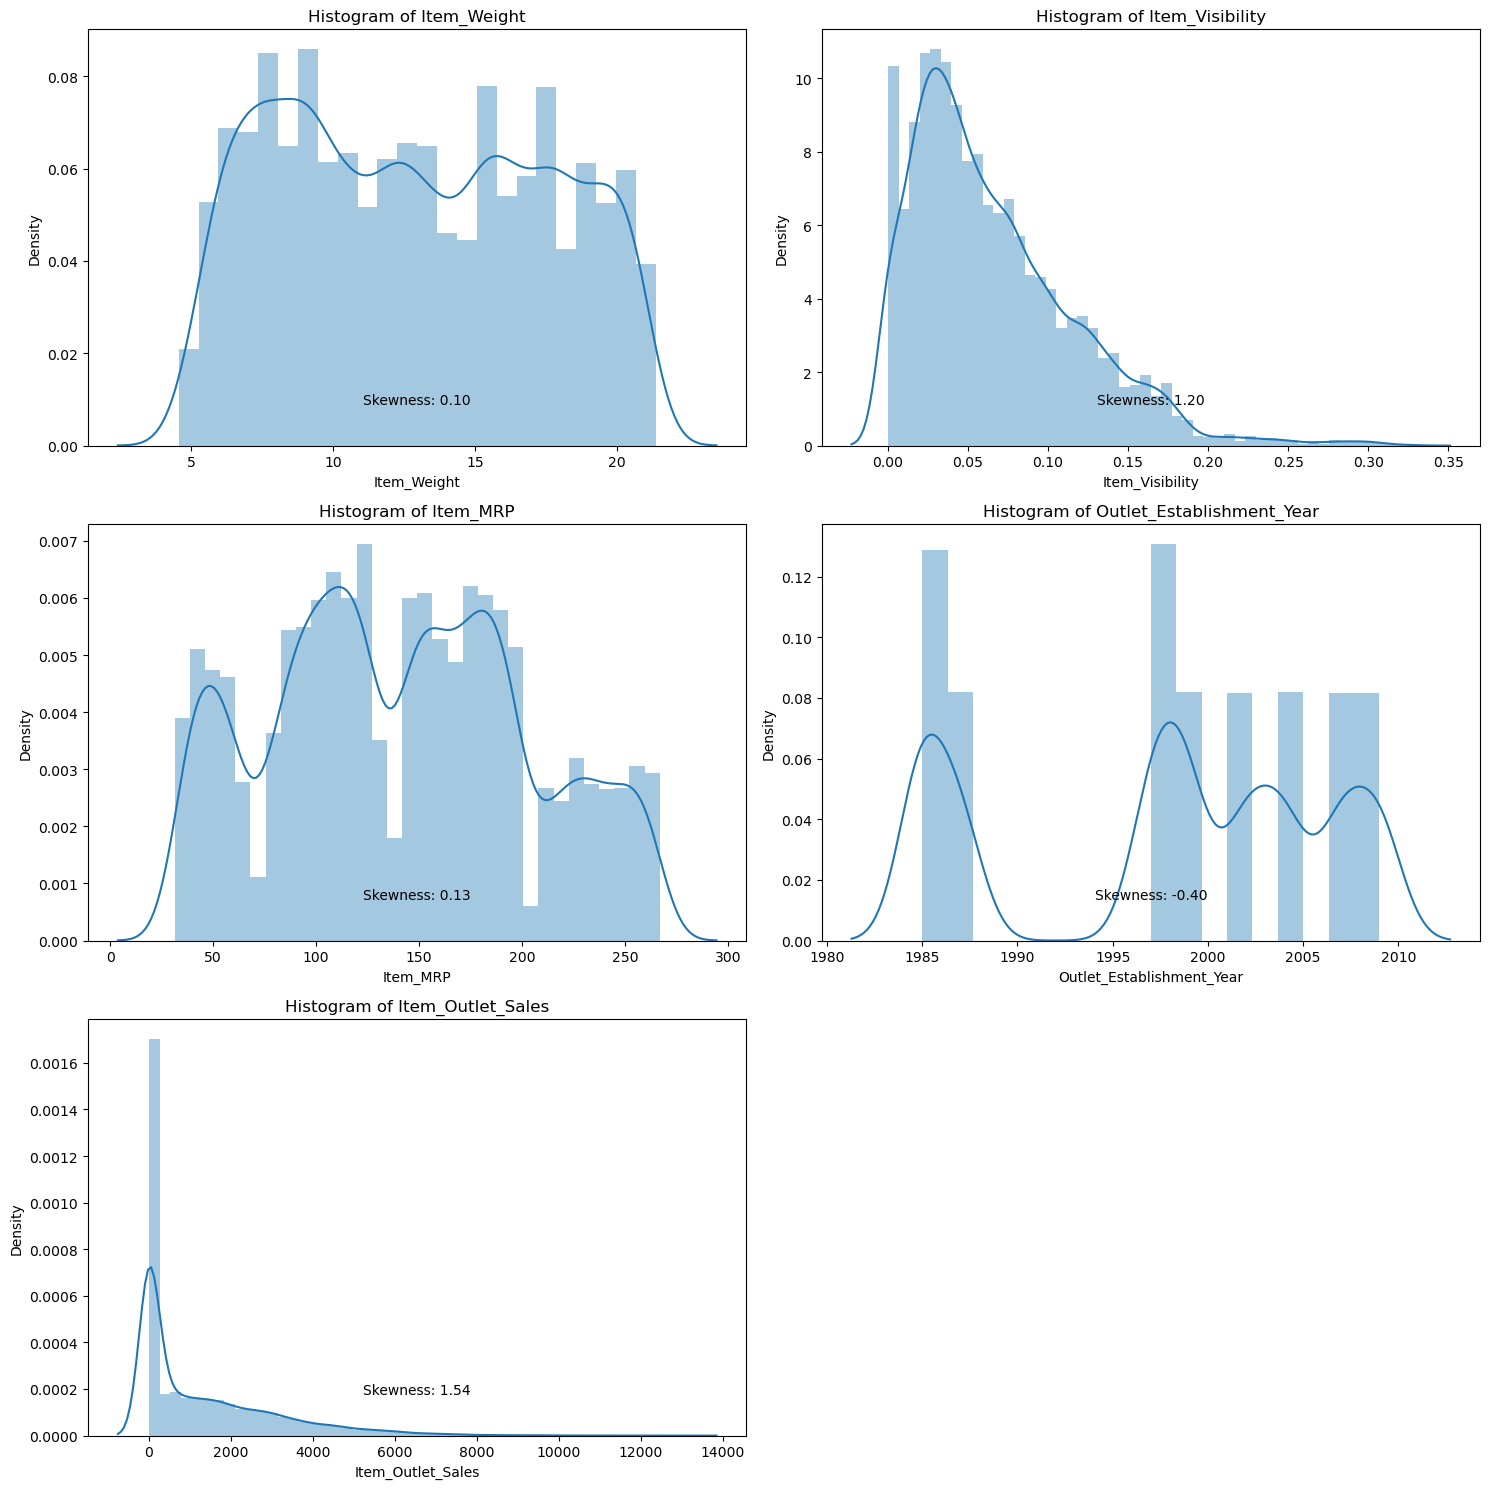

In [64]:
# Distribution plot of Numerical columns
plt.figure(figsize=(15,15))
for i, column in enumerate(num_col):
    plt.subplot(3,2,i+1)
    
    sns.distplot(combined_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    skewness = combined_df[column].skew()
    plt.annotate(f'Skewness: {skewness:.2f}', xy=(0.5, 0.1), xycoords='axes fraction', ha='center')

    
plt.tight_layout()
plt.show()


- If skewness is less than -1 or greater than 1, the distribution is **highly skewed.**
- If skewness is between -1 and -0.5 or between 0.5 and 1, the **distribution is moderately skewed**.
- If skewness is between -0.5 and 0.5, the distribution is **approximately symmetric.**

> **Inference:**
- Item_Outlet_Sales and Item_Visibility columns are highly skewed towards right side.

## Bivariate Analysis

Visualize the relationship between two numerical variables using a scatter plot.

In [65]:
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

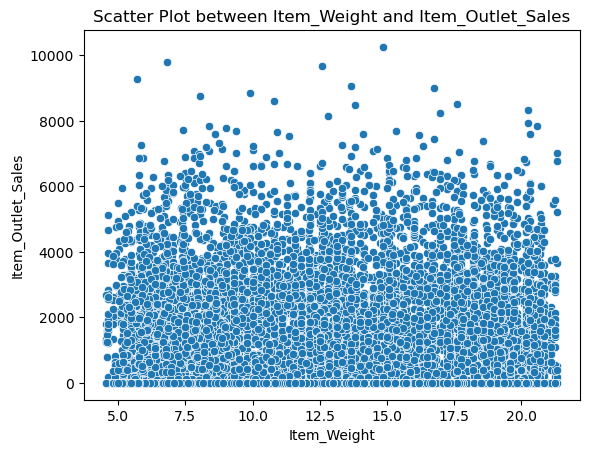

In [66]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=combined_df)
plt.title('Scatter Plot between Item_Weight and Item_Outlet_Sales')
plt.show()

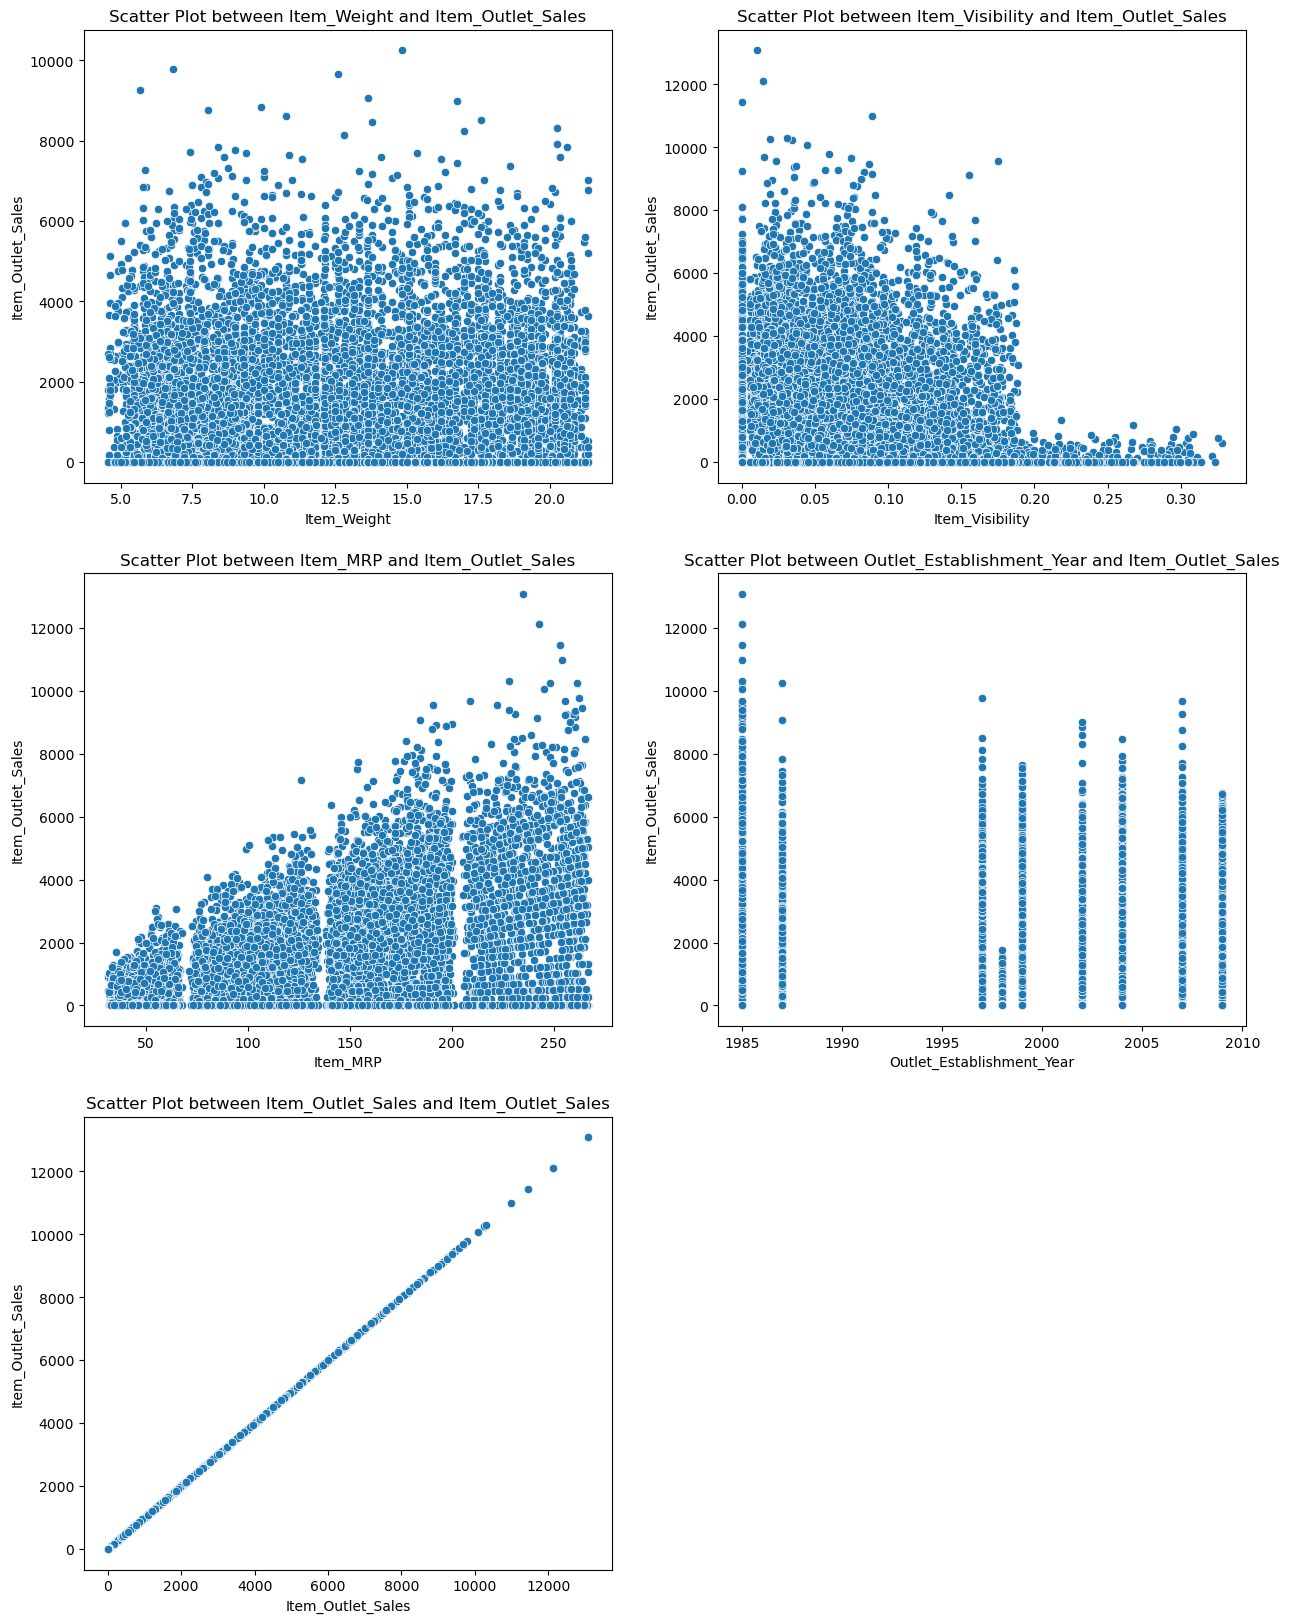

In [67]:
target_column = 'Item_Outlet_Sales'
plt.figure(figsize=(15, 20))

# Create scatter plots for each numerical column
for i, column in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=column, y=target_column, data=combined_df)
    plt.title(f'Scatter Plot between {column} and {target_column}')

plt.tight_layout    
plt.show()

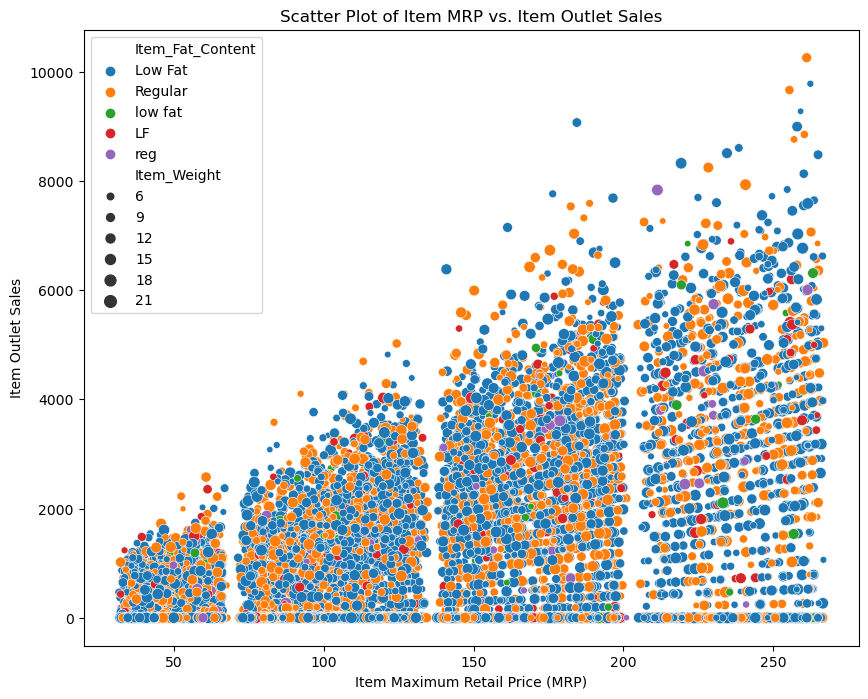

In [68]:
# Set the figure size for better visualization
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(
    x='Item_MRP',              
    y='Item_Outlet_Sales',     
    hue='Item_Fat_Content',    
    size='Item_Weight',        
    data=combined_df               
)
plt.title('Scatter Plot of Item MRP vs. Item Outlet Sales')

plt.xlabel('Item Maximum Retail Price (MRP)')
plt.ylabel('Item Outlet Sales')

plt.legend()
plt.show()

Quantify the strength and direction of a linear relationship between two numerical variables using correlation.

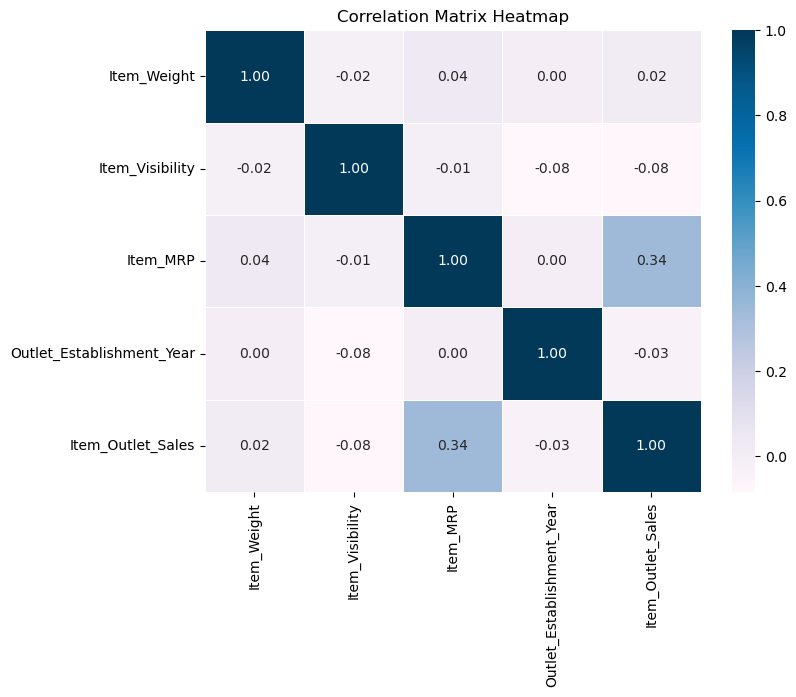

In [69]:
correlation_matrix = combined_df[num_col].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [70]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  markdown                   14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

Item_Fat_Content   
Item_Type
Outlet_Size
Outlet_Location_Type
Outlet_Type 

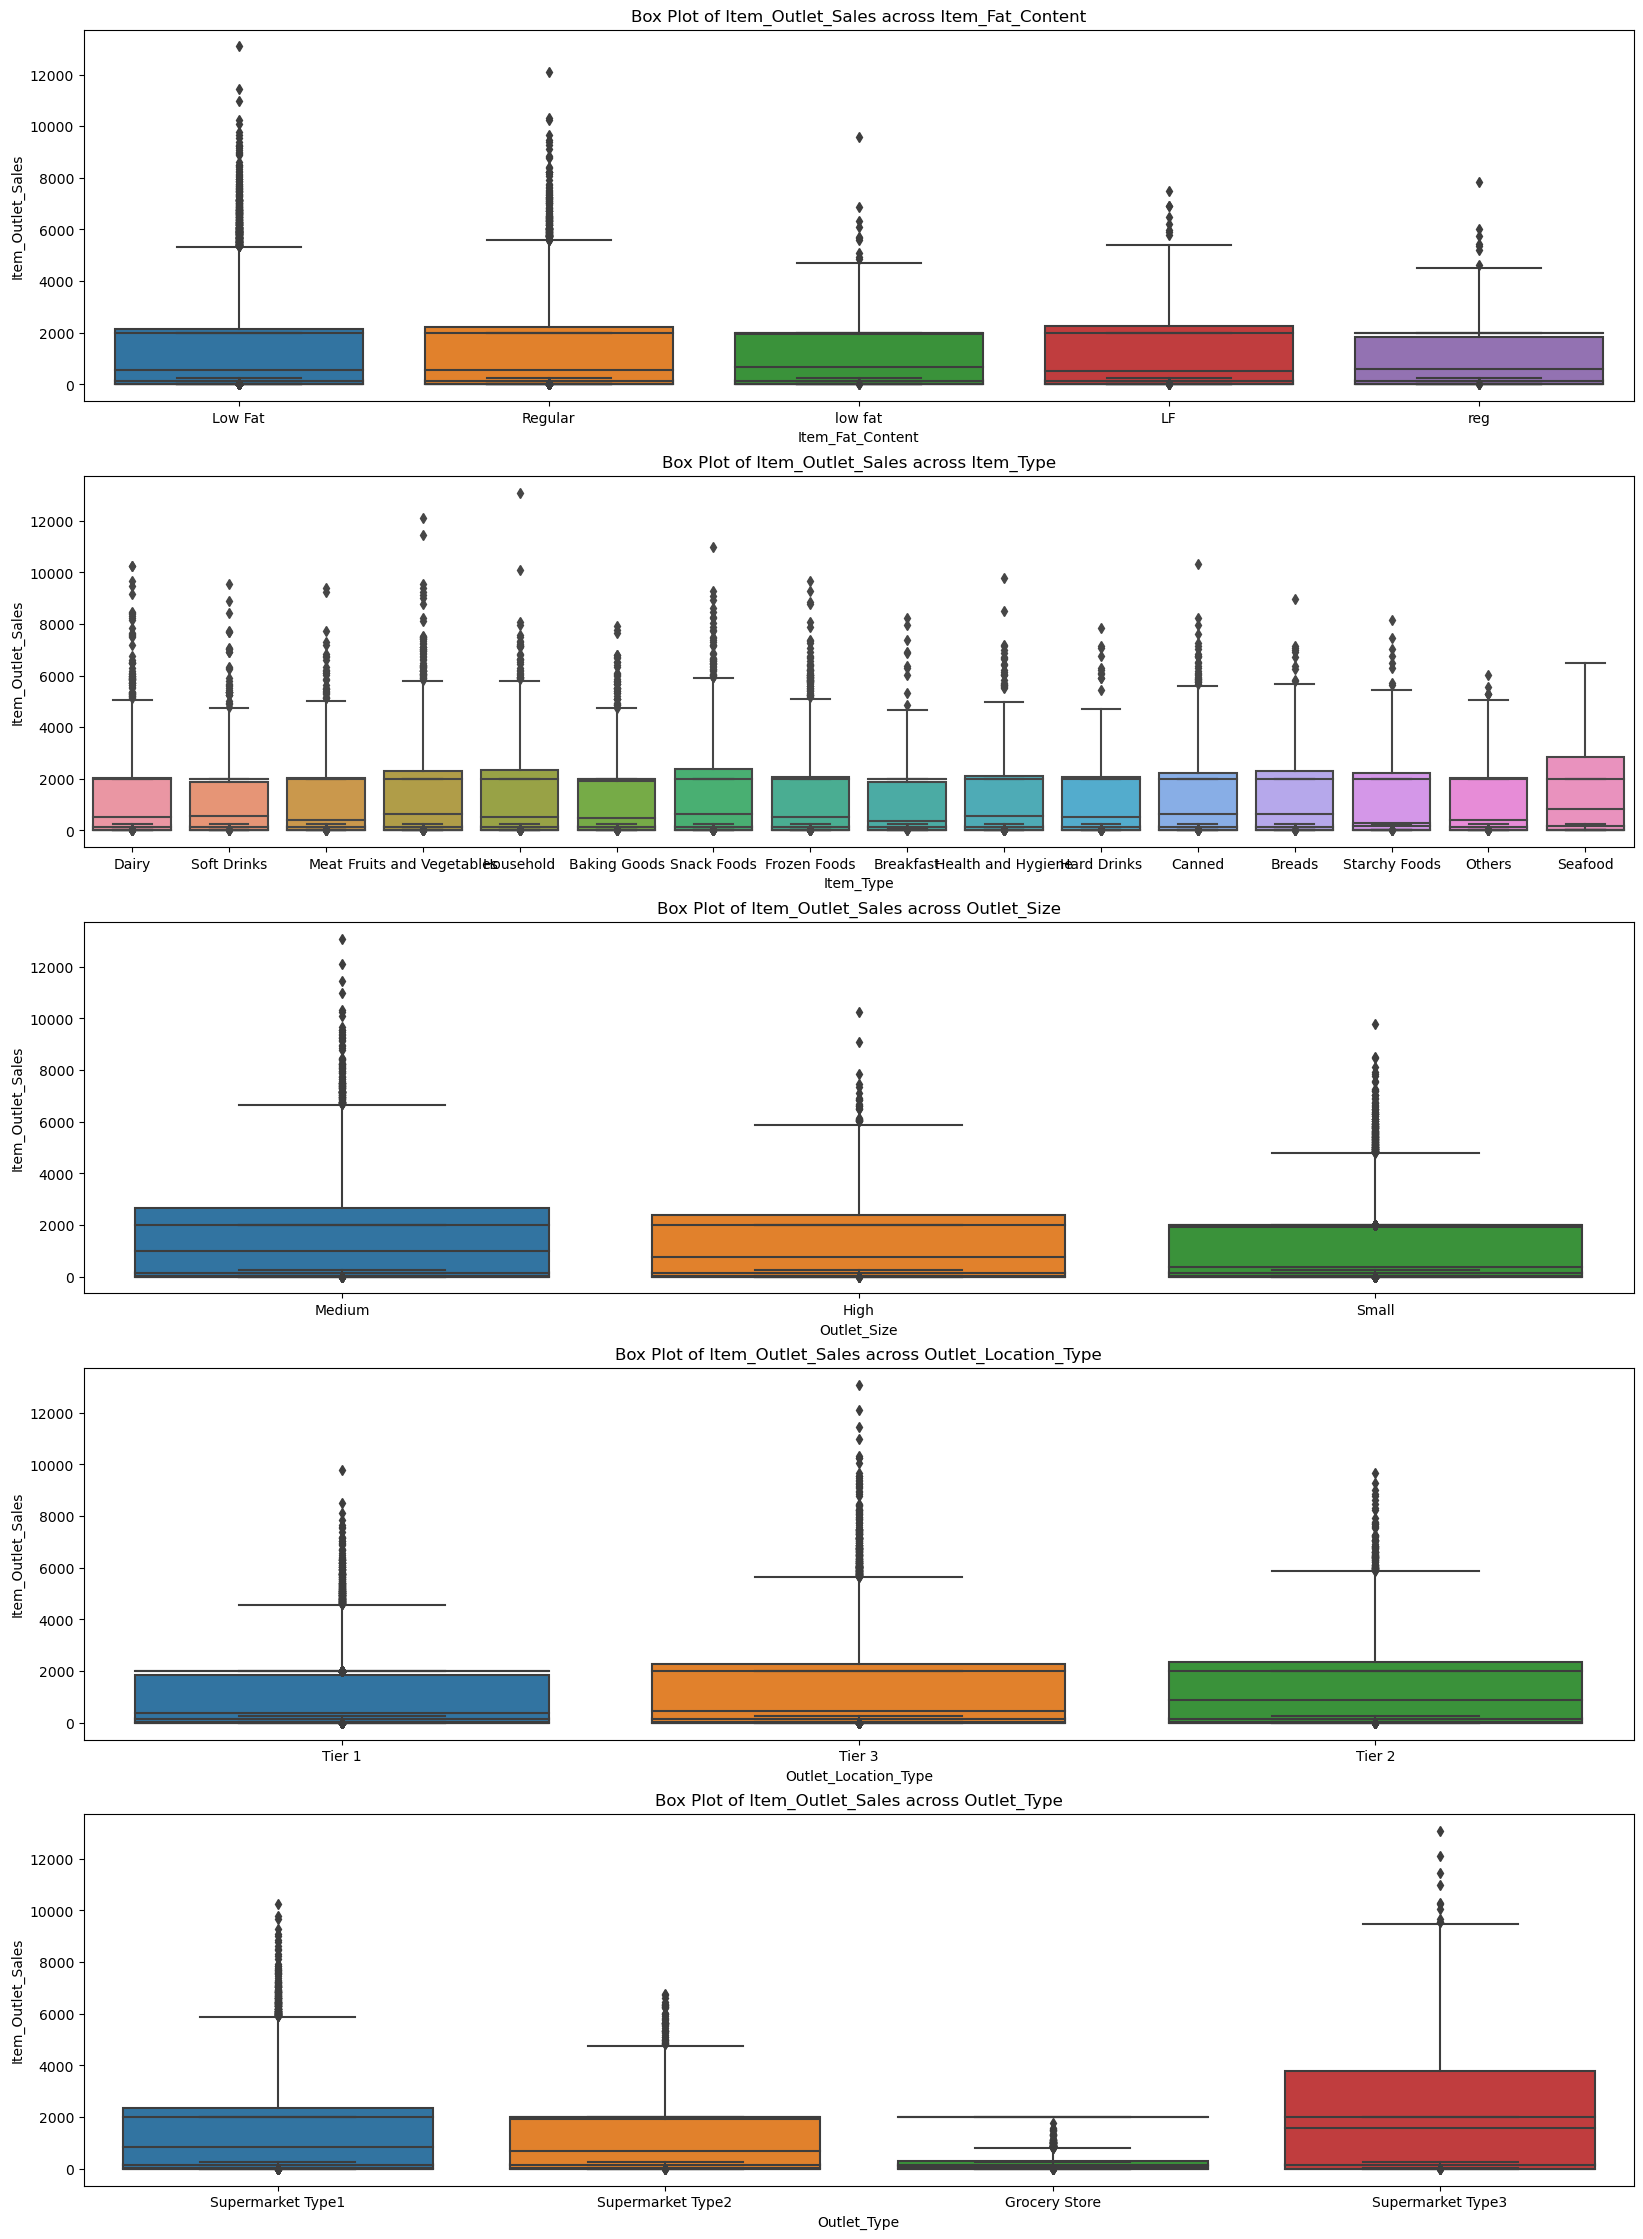

In [71]:

categorical_columns = ['Item_Fat_Content',
                       'Item_Type',
                       'Outlet_Size',
                       'Outlet_Location_Type',
                       'Outlet_Type']
numerical_columns = num_col
plt.figure(figsize=(20,28))
# Create box plots for each numerical column across each categorical column using nested loops
for i, categorical_column in enumerate(categorical_columns):
    plt.subplot(5,1,i+1)
    for numerical_column in numerical_columns:
        sns.boxplot(x=categorical_column, y=numerical_column, data=combined_df)
        plt.title(f'Box Plot of {numerical_column} across {categorical_column}')

plt.tight_layout
plt.show()

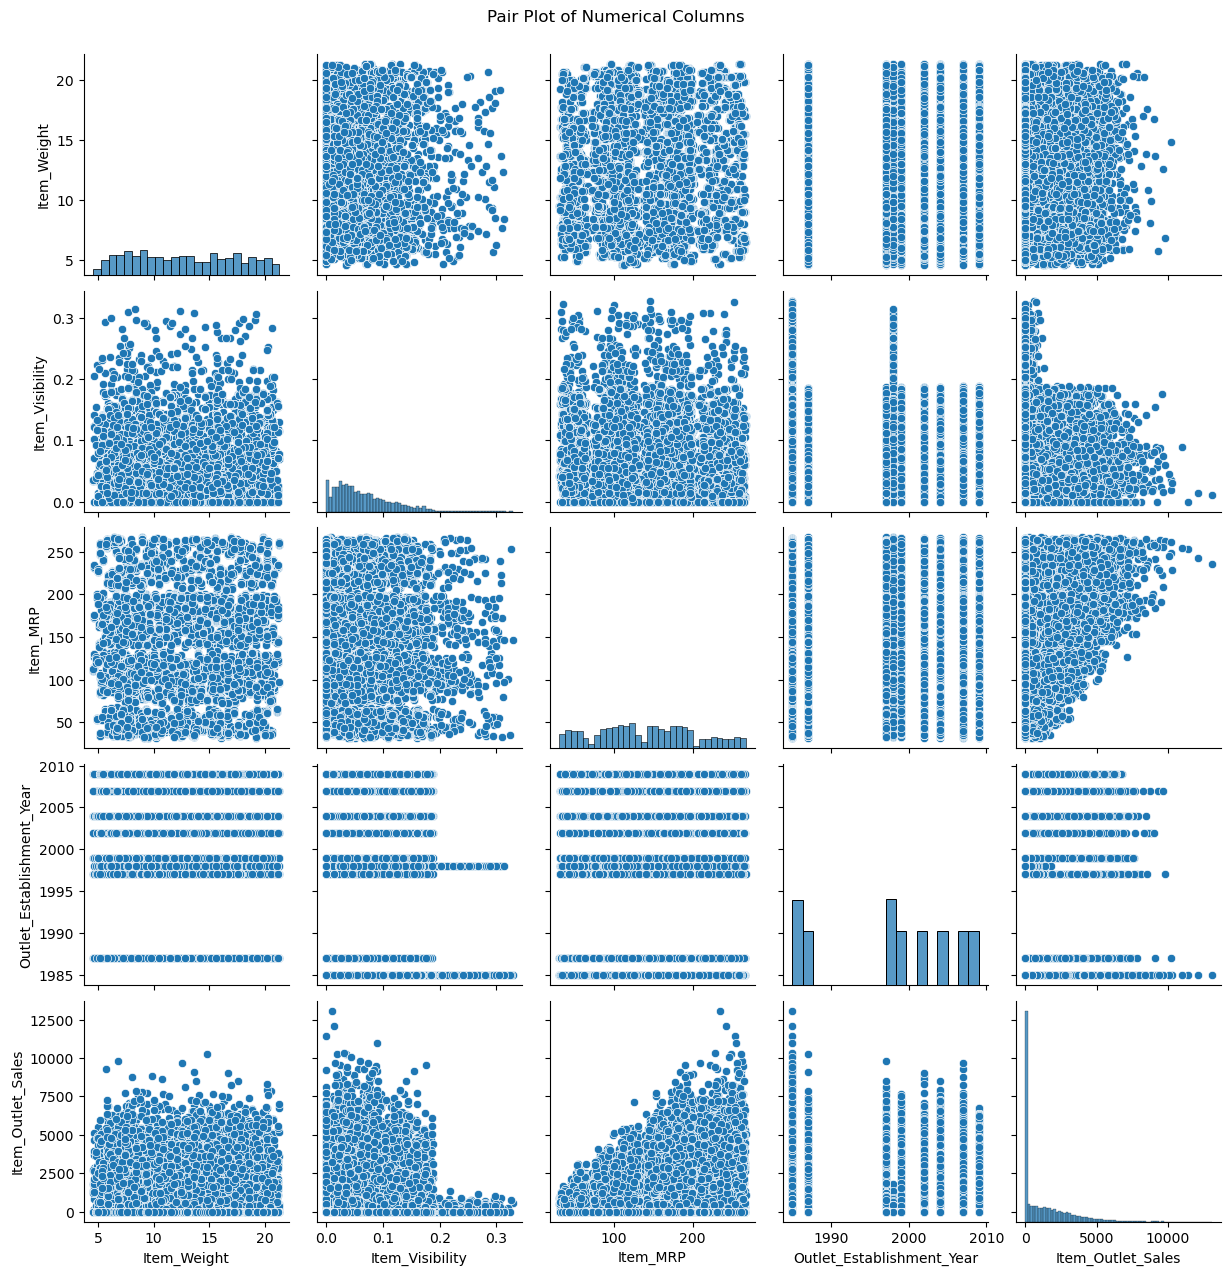

In [72]:
sns.pairplot(combined_df[num_col])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

### Data Cleaning

- Handle missing values, outliers, and inconsistencies in the dataset.
- Correct errors and format issues in the data.
- Transform variables if necessary 


**Correct errors and format issues in the data.**

In [73]:
combined_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [74]:
# replace same subcaregory 
combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'Low Fat':'low_fat',
                                                                          'Regular':'regular',
                                                                          'low fat':'low_fat',
                                                                          'LF':'low_fat',
                                                                          'reg':'regular'})

combined_df['Item_Fat_Content'].unique()

array(['low_fat', 'regular'], dtype=object)

**Handle missing values**

Replace the null values of Item_Weight column to mean of it.

In [75]:
mean_value = combined_df['Item_Weight'].mean()
mean_value

12.792854228644284

In [76]:
combined_df['Item_Weight'].fillna(mean_value, inplace=True)

In [77]:
combined_df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
markdown                        0
dtype: int64

Replacing the Outlet_Size Missing values by mode.

In [78]:
mode_value = combined_df['Outlet_Size'].mode()[0]

In [79]:
combined_df['Outlet_Size'].fillna(mode_value, inplace=True)

In [80]:
combined_df.isnull().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
markdown                     0
dtype: int64

**Handling the Outlier**

Identifying outliers in a dataset can be done using various statistical methods and visualization techniques.

In [81]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  markdown                   14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

**Statistical Methods:**

Z-Score:
Calculate the z-score for each data point. Data points with a z-score beyond a certain threshold (commonly 2 or 3) are considered outliers.

In [82]:
from scipy import stats

z_score = stats.zscore(combined_df[['Item_Weight']])
outliers = (abs(z_score) > 3)
outliers

Item_Weight
0            False
1            False
2            False
3            False
4            False
...            ...
14199        False
14200        False
14201        False
14202        False
14203        False

[14204 rows x 1 columns]

**Visualization**

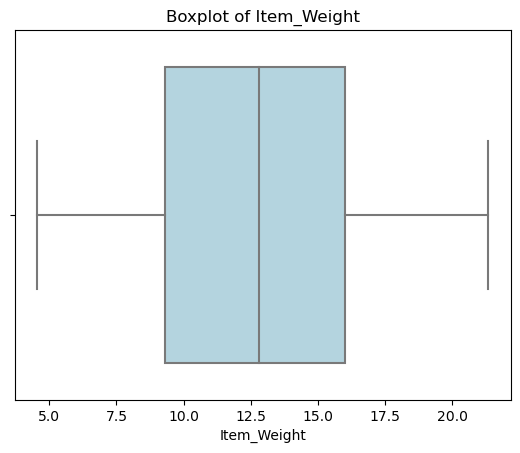

In [83]:
sns.boxplot(x=combined_df['Item_Weight'],color='lightblue')
plt.title('Boxplot of Item_Weight')
plt.show()

In [84]:
num_col = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

- **Outliers Treatment**

Upper limit:  0.19453961000000003
Lower limit:  -0.07346667400000001


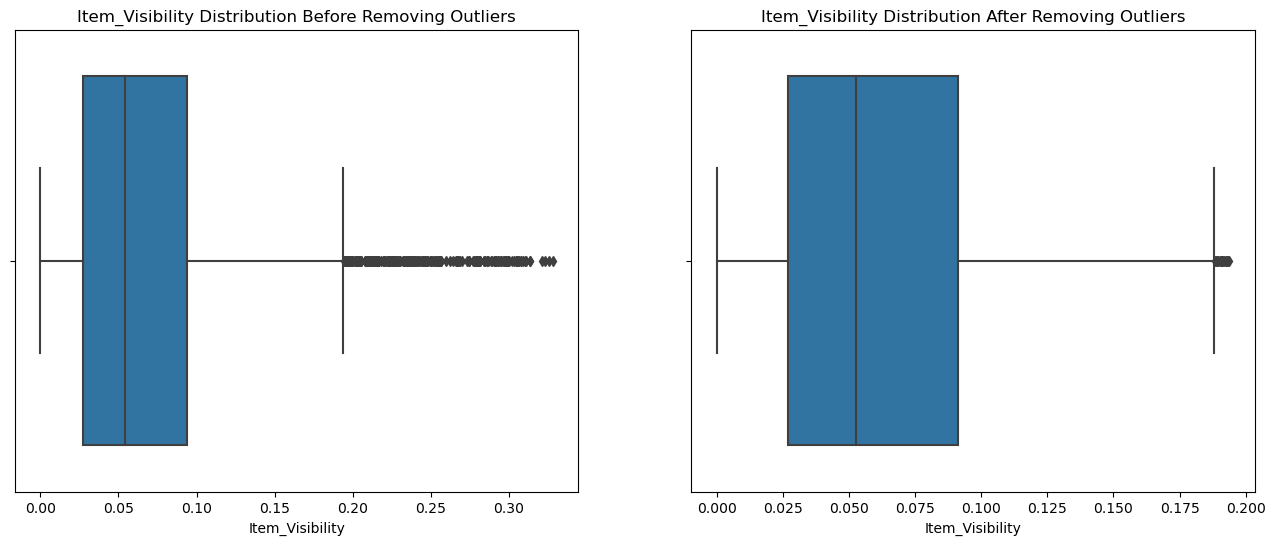

In [85]:
def detect_outliers(combined_df, feature):
    Q1 = combined_df[feature].quantile(0.25)
    Q3 = combined_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(combined_df, "Item_Visibility")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=combined_df['Item_Visibility'], ax=ax[0])
ax[0].set_title('Item_Visibility Distribution Before Removing Outliers')

# Remove outliers using the above function
combined_df = combined_df[(combined_df['Item_Visibility'] > lower_limit) & (combined_df['Item_Visibility'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=combined_df['Item_Visibility'], ax=ax[1])
ax[1].set_title('Item_Visibility Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  6497.7086500000005
Lower limit:  -2497.2493500000005


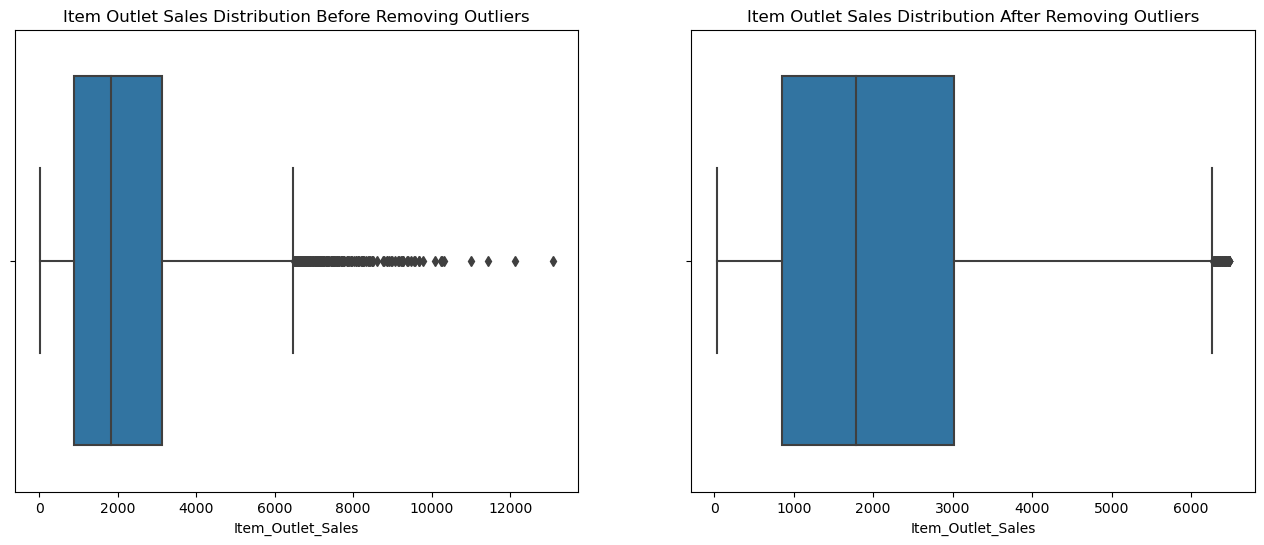

In [86]:
# Filter combined_df for rows where the source is 'train'
train_data = combined_df[combined_df['markdown'] == 'train']

# Detect outliers for 'Item_Outlet_Sales' in the 'train' portion of combined_df
upper_limit_sales, lower_limit_sales = detect_outliers(train_data, "Item_Outlet_Sales")
print("Upper limit: ", upper_limit_sales)
print("Lower limit: ", lower_limit_sales)

# Visualize the boxplot before removing outliers
_, ax_sales = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax_sales[0])
ax_sales[0].set_title('Item Outlet Sales Distribution Before Removing Outliers')

# Remove outliers using the same function
train_data = train_data[(train_data['Item_Outlet_Sales'] > lower_limit_sales) & (train_data['Item_Outlet_Sales'] < upper_limit_sales)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax_sales[1])
ax_sales[1].set_title('Item Outlet Sales Distribution After Removing Outliers')

# Show the plots
plt.show()

### Encoding Categorical Data

In [87]:
combined_df.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
14199           FDB58         10.5          regular         0.013496   
14200           FDD47          7.6          regular         0.142991   
14201           NCO17         10.0          low_fat         0.073529   
14202           FDJ26         15.3          regular         0.000000   
14203           FDU37          9.5          regular         0.104720   

                Item_Type  Item_MRP Outlet_Identifier  \
14199         Snack Foods  141.3154            OUT046   
14200       Starchy Foods  169.1448            OUT018   
14201  Health and Hygiene  118.7440            OUT045   
14202              Canned  214.6218            OUT017   
14203              Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002      Medium               Tier 2   
14202                       2007      Medium               Tier 2   
14203                       2002      Medium               Tier 2   

             Outlet_Type  Item_Outlet_Sales markdown  
14199  Supermarket Type1                0.0     test  
14200  Supermarket Type2                0.0     test  
14201  Supermarket Type1                0.0     test  
14202  Supermarket Type1                0.0     test  
14203  Supermarket Type1                0.0     test

In the 'Item_Type' feature, there are 16 categories. However, upon closer examination of the 'Item_Identifier,' it is observed that the first two characters signify the item type:

- 'FD' likely represents Food
- 'DR' likely represents Drinks
- 'NC' likely represents Non-Consumables

In [88]:
# we create new column for Item categories identifier
combined_df['Item_categories_Type'] = combined_df['Item_Identifier'].str[0:2]

In [89]:
# we drop the Item_Identifier column
combined_df.drop(columns='Item_Identifier',inplace=True)

In [90]:
combined_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          low_fat         0.016047                  Dairy   
1         5.92          regular         0.019278            Soft Drinks   
2        17.50          low_fat         0.016760                   Meat   
3        19.20          regular         0.000000  Fruits and Vegetables   
4         8.93          low_fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998      Medium   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales markdown  \
0               Tier 1  Supermarket Type1          3735.1380    train   
1               Tier 3  Supermarket Type2           443.4228    train   
2               Tier 1  Supermarket Type1          2097.2700    train   
3               Tier 3      Grocery Store           732.3800    train   
4               Tier 3  Supermarket Type1           994.7052    train   

  Item_categories_Type  
0                   FD  
1                   DR  
2                   FD  
3                   FD  
4                   NC

In [91]:
combined_df['Outlet_Size'] = combined_df['Outlet_Size'].map({'Small':1,'Medium':2,'High':3}).astype(int)

In [92]:
combined_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          low_fat         0.016047                  Dairy   
1         5.92          regular         0.019278            Soft Drinks   
2        17.50          low_fat         0.016760                   Meat   
3        19.20          regular         0.000000  Fruits and Vegetables   
4         8.93          low_fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092            OUT049                       1999            2   
1   48.2692            OUT018                       2009            2   
2  141.6180            OUT049                       1999            2   
3  182.0950            OUT010                       1998            2   
4   53.8614            OUT013                       1987            3   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales markdown  \
0               Tier 1  Supermarket Type1          3735.1380    train   
1               Tier 3  Supermarket Type2           443.4228    train   
2               Tier 1  Supermarket Type1          2097.2700    train   
3               Tier 3      Grocery Store           732.3800    train   
4               Tier 3  Supermarket Type1           994.7052    train   

  Item_categories_Type  
0                   FD  
1                   DR  
2                   FD  
3                   FD  
4                   NC

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

combined_df['Item_Fat_Content'] = le.fit_transform(combined_df['Item_Fat_Content'])
combined_df['Item_Type'] = le.fit_transform(combined_df['Item_Type'])
combined_df['Outlet_Size'] = le.fit_transform(combined_df['Outlet_Size'])
combined_df['Outlet_Location_Type'] = le.fit_transform(combined_df['Outlet_Location_Type'])
combined_df['Outlet_Type'] = le.fit_transform(combined_df['Outlet_Type'])

In [94]:
combined_df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   
2        17.50                 0         0.016760         10  141.6180   
3        19.20                 1         0.000000          6  182.0950   
4         8.93                 0         0.000000          9   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0            OUT049                       1999            1   
1            OUT018                       2009            1   
2            OUT049                       1999            1   
3            OUT010                       1998            1   
4            OUT013                       1987            2   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales markdown  \
0                     0            1          3735.1380    train   
1                     2            2           443.4228    train   
2                     0            1          2097.2700    train   
3                     2            0           732.3800    train   
4                     2            1           994.7052    train   

  Item_categories_Type  
0                   FD  
1                   DR  
2                   FD  
3                   FD  
4                   NC

In [95]:
# Selecting only the specified columns for train model
selected_columns = [
    'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
    'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year',
    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
    'markdown'
]

# Use loc or indexing to get the selected columns
combined_df = combined_df[selected_columns]

In [96]:
combined_df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   
2        17.50                 0         0.016760         10  141.6180   
3        19.20                 1         0.000000          6  182.0950   
4         8.93                 0         0.000000          9   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            2                     2            1   

   Item_Outlet_Sales markdown  
0          3735.1380    train  
1           443.4228    train  
2          2097.2700    train  
3           732.3800    train  
4           994.7052    train

In [97]:
combined_df.shape

(13943, 11)

## Split the data

In [98]:
# split combined_df in train and test set 
train = combined_df[combined_df['markdown'] == 'train'].reset_index(drop=True)

test = combined_df[combined_df['markdown'] == 'test'].reset_index(drop=True)

# Drop unnecessary columns from train and test
train.drop(['markdown'], axis=1, inplace=True)
test.drop(['markdown', 'Item_Outlet_Sales'], axis=1, inplace=True)

In [99]:
train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   
2        17.50                 0         0.016760         10  141.6180   
3        19.20                 1         0.000000          6  182.0950   
4         8.93                 0         0.000000          9   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            2                     2            1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [100]:
train.shape

(8375, 10)

In [101]:
test.shape

(5568, 9)

In [102]:
# Create features (X) and target variable (y)
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [103]:
# scale the X data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))

MinMaxScaler()


In [104]:
print(scaler.data_max_)

[2.13500000e+01 1.00000000e+00 1.93772568e-01 1.50000000e+01
 2.66888400e+02 2.00900000e+03 2.00000000e+00 2.00000000e+00
 3.00000000e+00]


In [105]:
X = scaler.transform(X)

In [106]:
X 

array([[0.28252456, 0.        , 0.08281513, ..., 0.5       , 0.        ,
        0.33333333],
       [0.08127419, 1.        , 0.09948888, ..., 0.5       , 1.        ,
        0.66666667],
       [0.77076511, 0.        , 0.08649354, ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.35992855, 0.        , 0.18158541, ..., 0.        , 0.5       ,
        0.33333333],
       [0.15808276, 1.        , 0.74943862, ..., 0.5       , 1.        ,
        0.66666667],
       [0.61000298, 0.        , 0.23160286, ..., 0.        , 0.        ,
        0.33333333]])

In [107]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train.shape

(6700, 9)

In [109]:
X.shape

(8375, 9)

## ML algorithm

- Linear Regression
- RandomForestRegressor
- XGBRegressor

In [110]:
#!pip install xgboost

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

In [112]:
lr = LinearRegression()
rf = RandomForestRegressor()
xgr = XGBRegressor()

In [113]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"MAE -: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE -: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE -: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-Squared -: {r2_score(y_test, y_pred)}")

In [114]:
mymodel(lr)

MAE -: 875.569595781307
MSE -: 1386331.4517943014
RMSE -: 1177.425773369303
R-Squared -: 0.5102402648053666


In [115]:
mymodel(rf)

MAE -: 774.9794183211941
MSE -: 1244283.3423951487
RMSE -: 1115.474492041458
R-Squared -: 0.5604226684103522


In [116]:
mymodel(xgr)

MAE -: 806.823774205759
MSE -: 1333897.07390272
RMSE -: 1154.9446194093982
R-Squared -: 0.5287641517142575


Training and Test Scores:

The training score is approximately 0.56, indicating that the model explains about 56% of the variance in the training data. The test score is also around 0.56, suggesting that the model generalizes reasonably well to new, unseen data.

Root Mean Squared Error (RMSE):
The RMSE, a measure of the model's prediction error, is approximately 1154.94.

R2 Score:
The R2 score is consistent with the test score, indicating the proportion of the variance in the dependent variable captured by the model.

## Hyperparameter Tuning

In [117]:
lr = LinearRegression(positive=True)
rf_new = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=5, min_samples_leaf=1)
xgr = XGBRegressor()

In [118]:
mymodel(lr)

MAE -: 895.9737475346861
MSE -: 1439876.210455892
RMSE -: 1199.9484199147444
R-Squared -: 0.49132410533338766


In [119]:
mymodel(rf_new)

MAE -: 744.4059872686138
MSE -: 1158933.0180213475
RMSE -: 1076.5375135225654
R-Squared -: 0.5905750192136081


In [120]:
mymodel(xgr)

MAE -: 806.823774205759
MSE -: 1333897.07390272
RMSE -: 1154.9446194093982
R-Squared -: 0.5287641517142575


> **Inference:** 

- Using Hyperparameters we can increase the model accuracy. As here in RandomForestRegressor using hyperparameter accuracy increase by 3-4 % 

### Cross Validation 

In [121]:
from sklearn.model_selection import cross_val_score
def cross_validation(model):
    scores = cross_val_score(model, X, y, cv=8)
    print(scores)
    print('Mean of Scores:',scores.mean())

In [122]:
cross_validation(rf_new)

[0.58698775 0.58700288 0.56187448 0.5250977  0.58856258 0.61177919
 0.5764813  0.57581391]
Mean of Scores: 0.5766999743346493


In conclusion, this project successfully implemented **Linear Regression, RandomForestRegressor, and XGBRegressor**  for predicting BigMart sales. Among these, **RandomForestRegressor demonstrated the highest accuracy, achieving a notable 60%**. This emphasizes the effectiveness of the model in capturing intricate data relationships and highlights the importance of exploring diverse algorithms. Future enhancements could involve further optimization of model parameters. Overall, the project provides valuable insights into sales forecasting for BigMart, showcasing the potential of machine learning techniques in extracting meaningful patterns from complex datasets.

## Summary

In this data science project, the initial steps involve loading libraries, exploring dataset structure, and conducting comprehensive exploratory data analysis (EDA) to understand variable distributions and relationships. Univariate and Bivariate Analyses provide insights into individual and paired variable behavior, while handling missing values is addressed through meticulous treatment. Feature engineering enhances predictive capabilities, and categorical variables are appropriately encoded. Preprocessing readies the data for modeling, which includes linear regression, RandomForest, and XGBoost algorithms. This structured approach, spanning from initial data exploration to advanced modeling techniques, contributes to a comprehensive and robust data science project. Each step is meticulously executed, facilitating a clear and effective analysis of the provided BigMart sales dataset.